# Tempo Estimation

Features tested in this notebook:

1. Novelty function peak density
2. Tempo

In [120]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
from scipy import signal
plt.rcParams['figure.figsize'] = (13, 5)

[&larr; Back to Index](index.html)

Load an audio file:

In [121]:
x, sr = librosa.load('D:/Documents/Final Year Project/Wav files/Survey 1/14.Vishwaroopam-VmusiQ.Com.wav', duration = 30, offset = 20)
x

array([-0.11965005, -0.13680804, -0.0678568 , ...,  0.43118247,
        0.33205423,  0.05811735], dtype=float32)

Compute the onset envelope, i.e. novelty function:

In [122]:
hop_length = 200 # samples per frame
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length, n_fft=2048)

Plot the onset envelope:

In [123]:
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

Text(0.5,1,'Novelty Function')

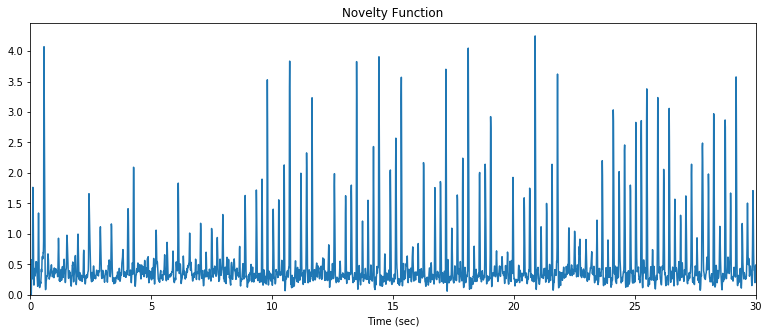

In [124]:
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5,1,'Novelty Function')

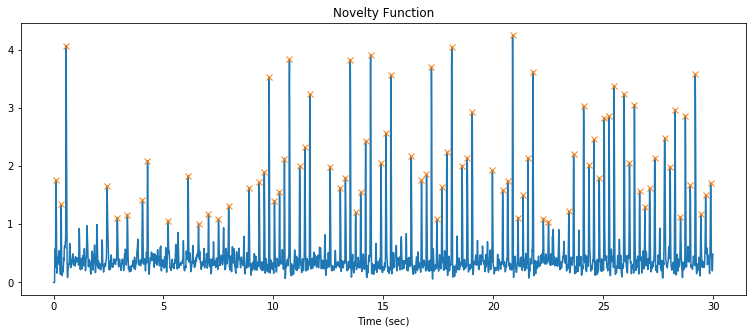

In [125]:
peaks, _= signal.find_peaks(onset_env, height=1)

t_peaks = librosa.frames_to_time(peaks, sr=sr, hop_length=hop_length)

plt.plot(t,onset_env)
plt.plot(t_peaks, onset_env[peaks], 'x')
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

In [126]:
t_diff = [t_peaks[i+1]-t_peaks[i] for i in range(len(t_peaks)-1)]
peak_density = 1/numpy.mean(t_diff)
peak_density

2.7537313432835817

## Estimating Global Tempo

Estimate the tempo:

In [127]:
tempo = librosa.beat.tempo(x, sr=sr)
print(tempo)

[ 129.19921875]


Visualize the tempo estimate on top of the input signal:

In [128]:
T = len(x)/float(sr)
seconds_per_beat = 60.0/(tempo[0])
beat_times = numpy.arange(0, T, seconds_per_beat)

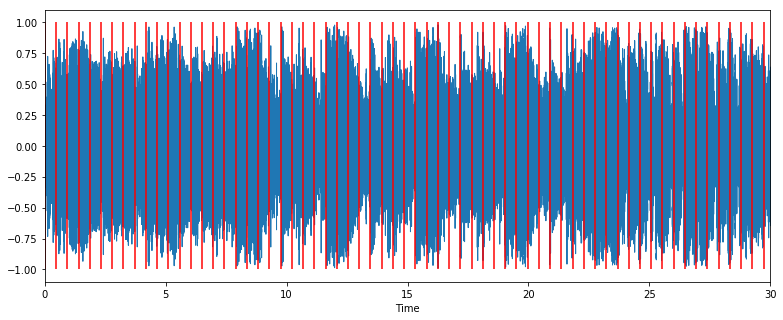

In [129]:
librosa.display.waveplot(x)
plt.vlines(beat_times, -1, 1, color='r')

Listen to the input signal with a click track using the tempo estimate:

In [130]:
clicks = librosa.clicks(beat_times, sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

[&larr; Back to Index](index.html)